<a href="https://colab.research.google.com/github/srilamaiti/ml_works/blob/main/latent_dirichlet_allocation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install advertools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.1/310.1 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.9/272.9 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 74.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 8.8 MB/s eta 0:00:00


In [13]:
import os
import numpy as np
import pandas as pd
import sklearn as sk
import os
import nltk
from nltk.data import find

import seaborn as sns
import matplotlib.pyplot as plt

import re
import string
import advertools as adv
from nltk.corpus import stopwords
from wordcloud import WordCloud
import itertools
import random

In [2]:
df = pd.read_csv("comments.csv")
df

,Business Unit Name,EVP,Facility Type,District,Comment Language,Original Comment Text,English Comment,Compound Sentiment Score,Overall Sentiment,spl_char_chk,deEmojify_text,emoji_present_flag,all_punct_chk,english_comment_length
0,05R-Denver,"Griffith, Kelly",OF,60,en,I can step down and go back to being a pharmac...,I can step down and go back to being a pharmac...,-0.6908,Negative,False,I can step down and go back to being a pharmac...,False,False,277.0
1,05R-Denver,"Griffith, Kelly",OF,60,en,I have worked more hours than I would have lik...,I have worked more hours than I would have lik...,-0.4005,Negative,False,I have worked more hours than I would have lik...,False,False,278.0
2,05R-Denver,"Griffith, Kelly",OF,60,en,"Corporate SLT ""Thank You"" for implementing “Li...","Corporate SLT ""Thank You"" for implementing “Li...",-0.0258,Negative,False,"Corporate SLT ""Thank You"" for implementing “Li...",False,False,458.0
3,05R-Denver,"Griffith, Kelly",OF,60,en,We have made incredible strides in the Denver ...,We have made incredible strides in the Denver ...,0.0258,Positive,False,We have made incredible strides in the Denver ...,False,False,296.0
4,05R-Denver,"Griffith, Kelly",OF,60,en,"Work on benefits, seems poorer every year.","Work on benefits, seems poorer every year.",0.0258,Positive,False,"Work on benefits, seems poorer every year.",False,False,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13160,20R-Southern,"Silva, Fernando",RT,D3,en,I sense an atmosphere of mutual respect among ...,I sense an atmosphere of mutual respect among ...,0.7506,Positive,False,I sense an atmosphere of mutual respect among ...,False,False,145.0
13161,20R-Southern,"Silva, Fernando",RT,D3,en,i enjoy work with james he alway have a smile ...,i enjoy work with james he alway have a smile ...,0.7506,Positive,False,i enjoy work with james he alway have a smile ...,False,False,120.0
13162,20R-Southern,"Silva, Fernando",RT,D3,en,This year I received a 30 cent hourly raise. T...,This year I received a 30 cent hourly raise. T...,0.7579,Positive,False,This year I received a 30 cent hourly raise. T...,False,False,375.0
13163,20R-Southern,"Silva, Fernando",RT,D3,en,More positive feedback and better hr availability,More positive feedback and better hr availability,0.7579,Positive,False,More positive feedback and better hr availability,False,False,49.0


In [8]:

def check(s):
    return all(i in string.punctuation for i in s)

def spl_char_chk(s):
    return s.lower() == s.upper()

def string_only_emoji_check(s):
    emoji_list = adv.extract_emoji(s)["emoji"]
    #print(emoji_list)
    merged_emoji_list = list(set(list(itertools.chain(*emoji_list))))
    #print(merged_emoji_list)
    if len(merged_emoji_list) == 0:
        return False
    else:
        return True

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

def unify_whitespaces(text):
    cleaned_string = re.sub(' +', ' ', text )
    return cleaned_string

13164

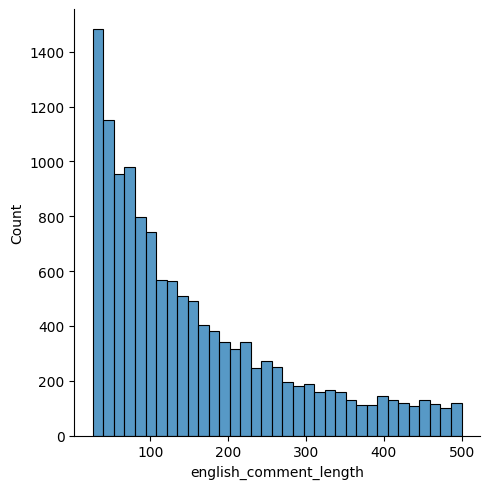

In [9]:
df = df[~df["Overall Sentiment"].isna()]
df = df[~df["English Comment"].isna()]

df["English Comment"] = df["English Comment"].apply(lambda x : x.replace("\n","").replace("\t","").strip())
df["English Comment"] = df["English Comment"].apply(lambda x : unify_whitespaces(x))
df['English Comment'] = np.where(df['English Comment'] == "nan", "none", df['English Comment'] )
df['English Comment'] = np.where(df['English Comment'] == "", "none", df['English Comment'])
df['English Comment'] = np.where(df['English Comment'].str.lower == "none", "none", df['English Comment'])
df['English Comment'] = np.where(((df['English Comment'] == ".") | (df['English Comment'] == "..") | (df['English Comment'] == "...") | (df['English Comment'] == "....") | (df['English Comment'] == ".....") | (df['English Comment'] == "......") | (df['English Comment'] == ".......") | (df['English Comment'] == "........") | (df['English Comment'] == ".........") | (df['English Comment'] == "..........")), "none", df['English Comment'] )
df = df[df['English Comment'] != 'none']
df = df[df["English Comment"] != "!"]

df["spl_char_chk"] = df["English Comment"].apply(lambda x : check(x.strip()))
df["deEmojify_text"] = df["English Comment"].apply(lambda x : deEmojify(x.strip()))
df["emoji_present_flag"] = np.where(df["English Comment"] == df["deEmojify_text"], False, True)
df["all_punct_chk"] = df["English Comment"].apply(lambda x : spl_char_chk(x.strip()))

df = df[df["spl_char_chk"] == False]
df = df[df["all_punct_chk"] == False]

df = df[df["English Comment"].str.lower() != "None"]
df = df[df["English Comment"].str.lower() != "no"]
df = df[df["English Comment"].str.lower() != "na"]
df = df[df["English Comment"].str.lower() != "n/a"]
df = df[df["English Comment"].str.lower() != "none"]
df = df[df["English Comment"].str.lower() != "nothing"]
df = df[df["English Comment"].str.lower() != "not really"]
df = df[df["English Comment"].str.lower() != "love it"]
df = df[df["English Comment"].str.lower() != "love it!"]
df = df[df["English Comment"].str.lower() != "nothing!!"]
df = df[df["English Comment"].str.lower() != "nothing!"]
df = df[df["English Comment"].str.lower() != "i love it"]
df = df[df["English Comment"].str.lower() != "i love it!"]
df = df[df["English Comment"].str.lower() != "no comments"]
df = df[df["English Comment"].str.lower() != "no comments."]
df = df[df["English Comment"].str.lower() != "love my job"]
df = df[df["English Comment"] != "#NAME?"]
df = df[df["English Comment"] != "zero"]
df["english_comment_length"] = df["English Comment"].apply(lambda x : len(x))
sns.displot(df.english_comment_length, kde=False)
df = df[(df["english_comment_length"] > 25)]

len(df)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = cv.fit_transform(df['deEmojify_text'])

In [11]:
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=7,random_state=42)
LDA.fit(dtm)

LatentDirichletAllocation(n_components=7, random_state=42)

In [17]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['departments', 'better', 'things', 'don', 'training', 'just', 'need', 'job', 'department', 'hours', 'people', 'feel', 'work', 'time', 'like']


THE TOP 15 WORDS FOR TOPIC #1
['hours', 'living', 'higher', 'benefits', 'need', 'make', 'paid', 'wage', 'raise', 'years', 'work', 'better', 'company', 'employees', 'pay']


THE TOP 15 WORDS FOR TOPIC #2
['management', 'wish', 'schedule', 'helpful', 'company', 'hard', 'nice', 'environment', 'manager', 'good', 'place', 'people', 'team', 'great', 'work']


THE TOP 15 WORDS FOR TOPIC #3
['people', 'really', 'feel', 'experience', 'years', 'enjoy', 'like', 'safeway', 'great', 'love', 'good', 'work', 'job', 'working', 'company']


THE TOP 15 WORDS FOR TOPIC #4
['job', 'training', 'time', 'stores', 'employee', 'believe', 'people', 'needs', 'better', 'feel', 'management', 'need', 'employees', 'company', 'store']


THE TOP 15 WORDS FOR TOPIC #5
['job', 'pay', 'does', 'department', 'work', 'think', 'customers', 'don', 'make'

In [18]:
len(cv.get_feature_names_out())

5391

In [21]:
for i in range(10):
    random_word_id = random.randint(0,len(cv.get_feature_names_out()))
    print(cv.get_feature_names_out()[random_word_id])

fake
stern
acquired
neutral
potential
floaters
teammate
disheartened
grow
scheduled


In [22]:
for i in range(10):
    random_word_id = random.randint(0,len(cv.get_feature_names_out()))
    print(cv.get_feature_names_out()[random_word_id])

messing
lopez
disappointing
teammates
id
developing
impacted
relatives
reports
iam


**Limitations**
There is limit to amount of topics we can generate
LDA is unable to depict correlations which led to occurrence of uncorrelated topics
There is no development of topics over time
LDA assumes words are exchangeable, sentence structure is not modeled
Unsupervised (sometimes weak supervision is desirable, e.g. in sentiment analysis)

In [23]:
topic_results = LDA.transform(dtm)
df['Topic'] = topic_results.argmax(axis=1)

In [24]:
df

,Business Unit Name,EVP,Facility Type,District,Comment Language,Original Comment Text,English Comment,Compound Sentiment Score,Overall Sentiment,spl_char_chk,deEmojify_text,emoji_present_flag,all_punct_chk,english_comment_length,Topic
0,05R-Denver,"Griffith, Kelly",OF,60,en,I can step down and go back to being a pharmac...,I can step down and go back to being a pharmac...,-0.6908,Negative,False,I can step down and go back to being a pharmac...,False,False,277,1
1,05R-Denver,"Griffith, Kelly",OF,60,en,I have worked more hours than I would have lik...,I have worked more hours than I would have lik...,-0.4005,Negative,False,I have worked more hours than I would have lik...,False,False,278,0
2,05R-Denver,"Griffith, Kelly",OF,60,en,"Corporate SLT ""Thank You"" for implementing “Li...","Corporate SLT ""Thank You"" for implementing “Li...",-0.0258,Negative,False,"Corporate SLT ""Thank You"" for implementing “Li...",False,False,458,6
3,05R-Denver,"Griffith, Kelly",OF,60,en,We have made incredible strides in the Denver ...,We have made incredible strides in the Denver ...,0.0258,Positive,False,We have made incredible strides in the Denver ...,False,False,296,6
4,05R-Denver,"Griffith, Kelly",OF,60,en,"Work on benefits, seems poorer every year.","Work on benefits, seems poorer every year.",0.0258,Positive,False,"Work on benefits, seems poorer every year.",False,False,42,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13159,20R-Southern,"Silva, Fernando",RT,D3,en,I enjoy coming to work and enjoy working with ...,I enjoy coming to work and enjoy working with ...,0.7506,Positive,False,I enjoy coming to work and enjoy working with ...,False,False,59,2
13160,20R-Southern,"Silva, Fernando",RT,D3,en,I sense an atmosphere of mutual respect among ...,I sense an atmosphere of mutual respect among ...,0.7506,Positive,False,I sense an atmosphere of mutual respect among ...,False,False,145,2
13161,20R-Southern,"Silva, Fernando",RT,D3,en,i enjoy work with james he alway have a smile ...,i enjoy work with james he alway have a smile ...,0.7506,Positive,False,i enjoy work with james he alway have a smile ...,False,False,120,2
13162,20R-Southern,"Silva, Fernando",RT,D3,en,This year I received a 30 cent hourly raise. T...,This year I received a 30 cent hourly raise. T...,0.7579,Positive,False,This year I received a 30 cent hourly raise. T...,False,False,375,1
